# **California housing kmeans clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

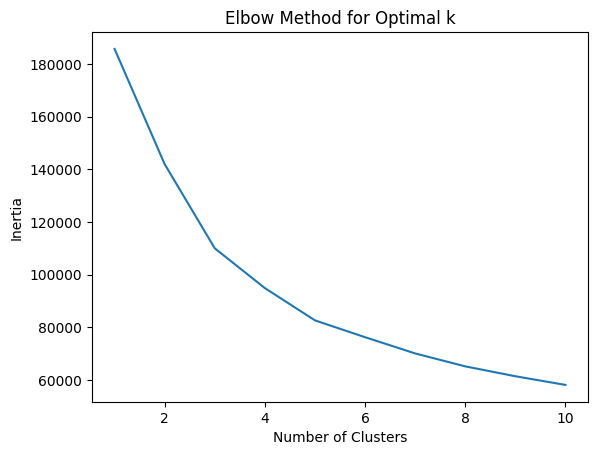

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


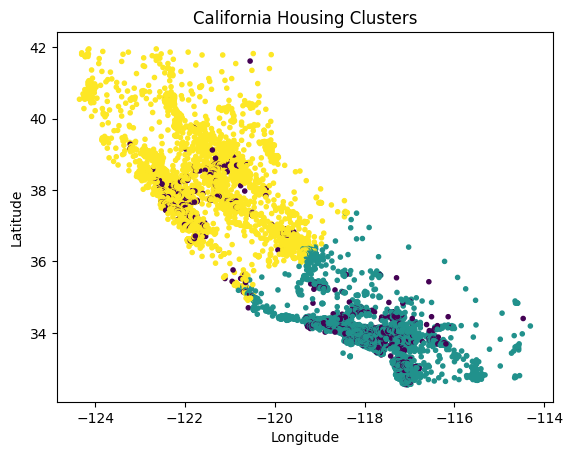

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the California housing dataset
data = pd.read_csv('/content/housing.csv')  # Replace 'california_housing.csv' with your dataset file path

# Handling missing values and non-numeric columns
data = data.drop(columns=['ocean_proximity'])  # Dropping non-numeric column, you might need to handle it differently

imputer = SimpleImputer(strategy='median')
data_clean = imputer.fit_transform(data)

scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_clean)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means clustering
k = 3  # Assuming optimal number of clusters as 3

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data_normalized)

data['Cluster'] = clusters

# Visualize the clusters
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'], cmap='viridis', marker='.')
plt.title('California Housing Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# **Calc JAC AND Gradient**

In [ ]:
import sympy as sp

# Define the variables
x, y, z = sp.symbols('x y z')

# Define a multivariable function (Example: f = x**2 + y**3 + z)
f = x**2 + y**3 + z

# Define the gradients (partial derivatives) of the function
partial_derivative_x = sp.diff(f, x)
partial_derivative_y = sp.diff(f, y)
partial_derivative_z = sp.diff(f, z)

# Display the gradients
print("Gradients (Partial Derivatives):")
print(f"Partial derivative w.r.t x: {partial_derivative_x}")
print(f"Partial derivative w.r.t y: {partial_derivative_y}")
print(f"Partial derivative w.r.t z: {partial_derivative_z}")

# Create a list of variables
variables = [x, y, z]

# Calculate the Jacobian matrix
jacobian_matrix = sp.Matrix([[sp.diff(f, var) for var in variables]])

# Display the Jacobian matrix
print("\nJacobian Matrix:")
print(jacobian_matrix)


Gradients (Partial Derivatives):
Partial derivative w.r.t x: 2*x
Partial derivative w.r.t y: 3*y**2
Partial derivative w.r.t z: 1

Jacobian Matrix:
Matrix([[2*x, 3*y**2, 1]])


# **IMAGE SEGMENTAION using Kmeans clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


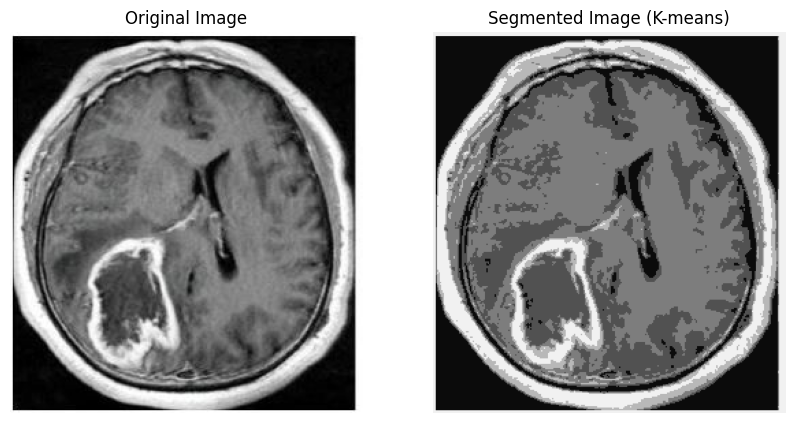

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

# Path to the 'yes' subfolder containing the brain tumor images
yes_folder_path = '/content/drive/MyDrive/brain_tumor_dataset/yes'  # Replace with your 'yes' folder path

# Select a specific image from the 'yes' folder
image_filename = '/content/drive/MyDrive/brain_tumor_dataset/yes/Y109.JPG'  # Replace with the filename of the image you want to segment

# Full path to the selected image
image_path = os.path.join(yes_folder_path, image_filename)

# Load the selected image
image = Image.open(image_path)
image_array = np.array(image)

reshaped_image = image_array.reshape((-1, 3))

# Number of clusters (K value)
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(reshaped_image)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

segmented_image = cluster_centers[cluster_labels].reshape(image_array.shape)

# Display the original and segmented image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image (K-means)')
plt.imshow(segmented_image.astype('uint8'))
plt.axis('off')

plt.show()
